In [211]:
import json
import requests
import requests.exceptions
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [224]:
stock = input('Ticker:')

headers_var = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

try:
    url_quote = 'https://query1.finance.yahoo.com/v7/finance/quote'
    query_str = {'symbols': stock}

    
    try:
        response1 = requests.request('GET',url_quote,headers=headers_var,params= query_str)
        response1.raise_for_status()
    except requests.exceptions.HTTPError as er_h:
        print ("Http Error:",er_h)
    except requests.exceptions.ConnectionError as er_c:
        print ("Connection Error:",er_c)
    except requests.exceptions.Timeout as er_t:
        print ("Timeout Error:",er_t)
    except requests.exceptions.RequestException as er:
        print ("Some Other Error",er)
    stock_json = response1.json()
    longName = stock_json['quoteResponse']['result'][0]['longName']
    ticker = stock_json['quoteResponse']['result'][0]['symbol']
    price = stock_json['quoteResponse']['result'][0]['regularMarketPrice']

    
    
    url2 = 'https://query1.finance.yahoo.com/v10/finance/quoteSummary/'
    query_str2 = {'symbol': stock, "modules": "defaultKeyStatistics"}
    try:
        response2 = requests.request('GET',url2,headers=headers_var,params= query_str2)
        response2.raise_for_status()
    except requests.exceptions.HTTPError as er_h:
        print ("Http Error:",er_h)
    except requests.exceptions.ConnectionError as er_c:
        print ("Connection Error:",er_c)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",er_t)
    except requests.exceptions.RequestException as er:
        print ("Some Other Error",er)
    stock_json2 = response2.json()
    profitMargins = stock_json2['quoteSummary']['result'][0]['defaultKeyStatistics']['profitMargins']

    
    
    query_str3 = {'symbol': stock, "modules": "financialData"}
    try:
        response3 = requests.request('GET',url2,headers=headers_var,params= query_str3)
        response3.raise_for_status
    except requests.exceptions.HTTPError as er_h:
        print ("Http Error:",er_h)
    except requests.exceptions.ConnectionError as er_c:
        print ("Connection Error:",er_c)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",er_t)
    except requests.exceptions.RequestException as er:
        print ("Some Other Error",er)
    stock_json3 = response3.json()
    targetMeanPrice = stock_json3['quoteSummary']['result'][0]['financialData']['targetMeanPrice']
    cashOnHand = stock_json3['quoteSummary']['result'][0]['financialData']['totalCash']

    
    results = {'Ticker':ticker, 
           'Company Name':longName, 
           'Price':price, 
           'Profit Margins':profitMargins, 
           'Target Mean Price':targetMeanPrice,
           'Access Date': date.today()}

    print(results)


    
    with open('results.json', 'w') as results_file:
        results_file.write(str(results))
    
except IndexError:
    print('Invalid Ticker. Try Again')

Ticker: goog


{'Ticker': 'GOOG', 'Company Name': 'Alphabet Inc.', 'Price': 98.3, 'Profit Margins': {'raw': 0.25892, 'fmt': '25.89%'}, 'Target Mean Price': {'raw': 148.95, 'fmt': '148.95'}, 'Access Date': datetime.date(2022, 10, 12)}


Type ticker to see historical price over the last five days: aapl


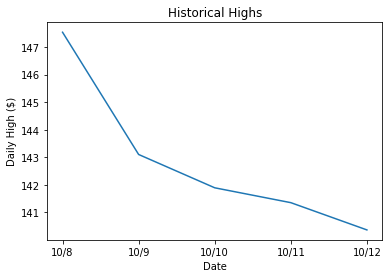

In [225]:
stock2 = input('Type ticker to see historical price over the last five days:')
headers_var = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

try:
    url_graph = 'https://query1.finance.yahoo.com/v8/finance/chart/?metrics=high?&interval=1d&range=5d'
    query_str4 = {'symbol': stock2,}
    response4 = requests.request('GET',url_graph,headers=headers_var,params= query_str4)
    stock_json4 = response4.json()

    highs = stock_json4['chart']['result'][0]['indicators']['quote'][0]['high']
    last5_dates = ['10/8', '10/9', '10/10', '10/11', '10/12']
    data = {'Date': last5_dates,
        'High': highs}
    df = pd.DataFrame(data)

    plt.plot(df['Date'],df['High'])
    plt.title('Historical Highs')
    plt.xlabel('Date')
    plt.ylabel('Daily High ($)')
    plt.show()
    
except TypeError:
    print('Invalid Ticker. Try Again')
